# 微积分


在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。
为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。
如图所示，内接多边形的等长边越多，就越接近圆。
这个过程也被称为*逼近法*（method of exhaustion）。

![用逼近法求圆的面积](../img/polygon-circle.svg)

事实上，逼近法就是*积分*（integral calculus）的起源。
2000多年后，微积分的另一支，*微分*（differential calculus）被发明出来。
在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。
通常情况下，变得更好意味着最小化一个*损失函数*（loss function），
即一个衡量“模型有多糟糕”这个问题的分数。
最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。
但“训练”模型只能将模型与我们实际能看到的数据相拟合。
因此，我们可以将拟合模型的任务分解为两个关键问题：

* *优化*（optimization）：用模型拟合观测数据的过程；
* *泛化*（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。



# 导数和微分

我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。
在深度学习中，我们通常选择对于模型参数可微的损失函数。
简而言之，对于每个参数，
如果我们把这个参数*增加*或*减少*一个无穷小的量，可以知道损失会以多快的速度增加或减少，

假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。
(**如果$f$的*导数*存在，这个极限被定义为**)

$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$


如果$f'(a)$存在，则称$f$在$a$处是*可微*（differentiable）的。
如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。
我们可以将公式中的导数$f'(x)$解释为$f(x)$相对于$x$的*瞬时*（instantaneous）变化率。
所谓的瞬时变化率是基于$x$中的变化$h$，且$h$接近$0$。

为了更好地解释导数，让我们做一个实验。
(**定义$u=f(x)=3x^2-4x$**)如下：


In [4]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**通过令$x=1$并让$h$接近$0$，**] 公式中(**$\frac{f(x+h)-f(x)}{h}$的数值结果接近$2$**)。
虽然这个实验不是一个数学证明，但稍后会看到，当$x=1$时，导数$u'$是$2$。

In [5]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号$\frac{d}{dx}$和$D$是*微分运算符*，表示*微分*操作。
我们可以使用以下规则来对常见函数求微分：

* $DC = 0$（$C$是一个常数）
* $Dx^n = nx^{n-1}$（*幂律*（power rule），$n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。
假设函数$f$和$g$都是可微的，$C$是一个常数，则：

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

现在我们可以应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。
令$x=1$，我们有$u'=2$：在这个实验中，数值结果接近$2$，
这一点得到了在本节前面的实验的支持。
当$x=1$时，此导数也是曲线$u=f(x)$切线的斜率。

[**为了对导数的这种解释进行可视化，我们将使用`matplotlib`**]，
这是一个Python中流行的绘图库。
要配置`matplotlib`生成图形的属性，我们需要(**定义几个函数**)。
在下面，`use_svg_display`函数指定`matplotlib`软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是一个特殊的标记，会将对应的函数、类或语句保存在`d2l`包中。
因此，以后无须重新定义就可以直接调用它们（例如，`d2l.use_svg_display()`）。

In [6]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

我们定义`set_figsize`函数来设置图表大小。
注意，这里可以直接使用`d2l.plt`，因为导入语句
`from matplotlib import pyplot as plt`已标记为保存到`d2l`包中。

In [7]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的`set_axes`函数用于设置由`matplotlib`生成图表的轴的属性。


In [8]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，定义一个`plot`函数来简洁地绘制多条曲线，
因为我们需要在整个书中可视化许多曲线。


In [9]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$**]，
其中系数$2$是切线的斜率。

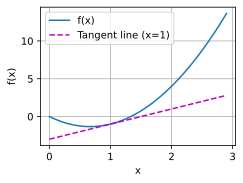

In [10]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 偏导数

到目前为止，我们只讨论了仅含一个变量的函数的微分。
在深度学习中，函数通常依赖于许多变量。
因此，我们需要将微分的思想推广到*多元函数*（multivariate function）上。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数。
$y$关于第$i$个参数$x_i$的*偏导数*（partial derivative）为：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$，
我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，
并计算$y$关于$x_i$的导数。
对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$



# 梯度

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的*梯度*（gradient）向量。
具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。

假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。
正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。


# 链式法则

然而，上面方法可能很难找到梯度。
这是因为在深度学习中，多元函数通常是*复合*（composite）的，
所以难以应用上述任何规则来微分这些函数。
幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。
假设可微分函数$y$有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。
注意，$y$是$x_1, x_2， \ldots, x_n$的函数。
对于任意$i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$


# 小结

* 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。
* 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。
* 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。
* 链式法则可以用来微分复合函数。


# 练习


# 1

1.绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。


函数在 $x=0$ 处有不可去间断
计算要点：
- $f(1) = 1 - \frac{1}{1} = 0$，切点为 $(1,0)$
- $f'(x)=3x^2 + \frac{1}{x^2}$，所以 $f'(1) = 4$
- 切线方程：$y=4(x-1)$


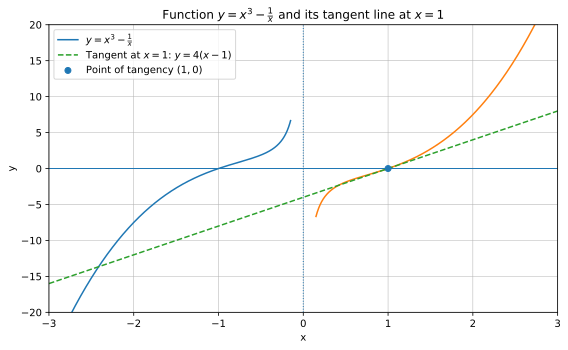

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1/x

# Tangent at x=1
x0 = 1.0
y0 = f(x0)
m = 3*x0**2 + 1/(x0**2)  # derivative: 3x^2 + 1/x^2
def tangent(x):
    return y0 + m*(x - x0)

# Domain (avoid x=0)
x_left = np.linspace(-3, -0.15, 1000)
x_right = np.linspace(0.15, 3, 1000)
x_line = np.linspace(-3, 3, 500)

plt.figure(figsize=(8, 5))
plt.plot(x_left, f(x_left), label=r"$y=x^3-\frac{1}{x}$")
plt.plot(x_right, f(x_right))
plt.plot(x_line, tangent(x_line), label=r"Tangent at $x=1$: $y=4(x-1)$", linestyle="--")
plt.scatter([x0], [y0], zorder=3, label=r"Point of tangency $(1,0)$")

plt.axvline(0, linestyle=":", linewidth=1)
plt.axhline(0, linewidth=1)

plt.xlim(-3, 3)
plt.ylim(-20, 20)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Function $y=x^3-\frac{1}{x}$ and its tangent line at $x=1$")
plt.legend()
plt.grid(True, linewidth=0.5)
plt.tight_layout()
plt.show()


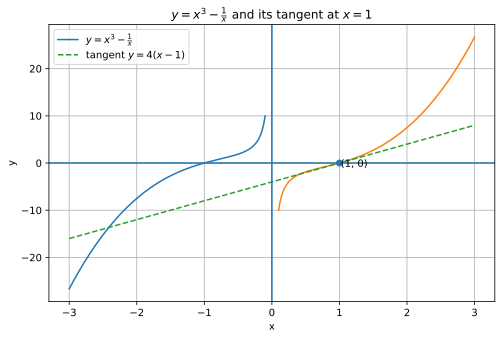

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return x**3 - 1/x

# 切点
x0 = 1.0
y0 = f(x0)

# 导数 f'(x) = 3x^2 + 1/x^2
k = 3*x0**2 + 1/(x0**2)

# 切线函数
def tangent(x):
    return y0 + k*(x - x0)

# 绘制区间（避开 x=0）
x_left = np.linspace(-3, -0.1, 500)
x_right = np.linspace(0.1, 3, 500)
x_line = np.linspace(-3, 3, 500)

# 作图
plt.figure(figsize=(8, 5))
plt.plot(x_left, f(x_left), label=r"$y=x^3-\frac{1}{x}$")
plt.plot(x_right, f(x_right))
plt.plot(x_line, tangent(x_line), linestyle="--",
         label=r"tangent $y=4(x-1)$")

# 标出切点
plt.scatter([x0], [y0], zorder=3)
plt.text(1.02, -0.8, "(1, 0)")

# 坐标轴与网格
plt.axhline(0)
plt.axvline(0)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$y=x^3-\frac{1}{x}$ and its tangent at $x=1$")
plt.legend()
plt.grid(True)

plt.show()


# 2
2.求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。


函数

$$
f(\mathbf{x}) = f(x_1, x_2) = 3x_1^2 + 5e^{x_2}
$$

分别对各分量求偏导数：

* 对 $x_1$ 求偏导：

$$
  \frac{\partial f}{\partial x_1} = 6x_1
$$

* 对 $x_2$ 求偏导：

$$
  \frac{\partial f}{\partial x_2} = 5e^{x_2}
$$

---

因此，梯度为

$$
\nabla f(\mathbf{x}) =
\begin{pmatrix}
6x_1 \
5e^{x_2}
\end{pmatrix}
$$

或写成向量形式：

$$
\nabla f(x_1,x_2) = (6x_1, 5e^{x_2})^\top
$$


# 3

3.函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？

设

$$
f(\mathbf{x})=\|\mathbf{x}\|_2=\sqrt{x_1^2+x_2^2+\cdots+x_n^2},\quad \mathbf{x}\in\mathbb{R}^n
$$

---

## 一、在 $\mathbf{x}\neq \mathbf{0}$ 时

对每个分量 $x_i$ 求偏导：

$$
\frac{\partial f}{\partial x_i}
= \frac{x_i}{\|\mathbf{x}\|_2}
$$

因此，梯度为

$$
\nabla f(\mathbf{x})
= \frac{\mathbf{x}}{\|\mathbf{x}\|_2},
\quad \mathbf{x}\neq \mathbf{0}
$$

这是一个**单位向量**，方向与 $\mathbf{x}$ 相同。

---

## 二、在 $\mathbf{x}=\mathbf{0}$ 处

函数

$$
f(\mathbf{x})=\|\mathbf{x}\|_2
$$

在 $\mathbf{0}$ 处**不可微**，因此梯度 **不存在**。

不过，在优化理论中常用其**次梯度（subgradient）**：

$$
\partial f(\mathbf{0})
= {\mathbf{g}\in\mathbb{R}^n : \|\mathbf{g}\|_2 \le 1}
$$

---

## 三、总结

$$
\nabla \|\mathbf{x}\|_2 =
\begin{cases}
\dfrac{\mathbf{x}}{\|\mathbf{x}\|_2}, & \mathbf{x}\neq \mathbf{0} \\
\text{不存在（但有次梯度）}, & \mathbf{x}=\mathbf{0}
\end{cases}
$$

这是凸优化、机器学习和正则化（如 L2 范数）中非常基础且重要的结论。


# 4 
4.尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。

设

$$
u=f(x,y,z),\qquad \qquad \qquad x=x(a,b),\quad y=y(a,b),\quad z=z(a,b)
$$

其中 $f$ 对其自变量可微，$x,y,z$ 对 $a,b$ 可微。

---

## 一、对 $a$ 的链式法则

$$
\frac{\partial u}{\partial a} =
\frac{\partial f}{\partial x}\frac{\partial x}{\partial a}
+
\frac{\partial f}{\partial y}\frac{\partial y}{\partial a}
+
\frac{\partial f}{\partial z}\frac{\partial z}{\partial a}
$$

---

## 二、对 $b$ 的链式法则

$$
\frac{\partial u}{\partial b} =
\frac{\partial f}{\partial x}\frac{\partial x}{\partial b}
+
\frac{\partial f}{\partial y}\frac{\partial y}{\partial b}
+
\frac{\partial f}{\partial z}\frac{\partial z}{\partial b}
$$

---

## 三、向量（梯度）形式（更紧凑）

记

$$
\nabla f = \begin{pmatrix} f_x & f_y & f_z \end{pmatrix},
\qquad
\frac{\partial (x,y,z)}{\partial (a,b)} =
\begin{pmatrix}
x_a & x_b \\
y_a & y_b \\
z_a & z_b
\end{pmatrix}
$$

则链式法则可写为：

$$
\nabla_{(a,b)} u =
\nabla f \cdot
\frac{\partial (x,y,z)}{\partial (a,b)}
$$

---

## 四、总结

$$
\boxed{
\begin{aligned}
\frac{\partial u}{\partial a}
&= f_x x_a + f_y y_a + f_z z_a \\
\frac{\partial u}{\partial b}
&= f_x x_b + f_y y_b + f_z z_b
\end{aligned}
}
$$

这是多元复合函数求偏导的标准链式法则形式，在高等数学与多元微分中非常常用。
